In [1]:
import pandas as pd

# Load the CSV, skipping the first two rows
df = pd.read_csv("../data/AAPL_historical.csv", skiprows=2)

# Rename columns correctly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Set Date as index for time series analysis
df.set_index("Date", inplace=True)

# Verify the fix
print(df.head())
print(df.info())


                Close       High        Low       Open     Volume
Date                                                             
2015-01-02  24.320429  24.789798  23.879978  24.778675  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637514  23.897780  23.274920  23.699800  263188400
2015-01-07  23.968964  24.069065  23.735391  23.846616  160423600
2015-01-08  24.889904  24.947741  24.180289  24.298189  237458000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1762 non-null   float64
 1   High    1762 non-null   float64
 2   Low     1762 non-null   float64
 3   Open    1762 non-null   float64
 4   Volume  1762 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.6 KB
None


In [2]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the 'Close' column
result = adfuller(df['Close'])

# Print the test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")


ADF Statistic: 2.0334693236348613
p-value: 0.998714893818357
Critical Values:
   1%: -3.4341116127463858
   5%: -2.863201542300677
   10%: -2.567654556829725


In [3]:
# Apply first-order differencing
df["Close_diff"] = df["Close"].diff()

# Drop NaN values that result from differencing
df_diff = df.dropna()

# Re-run the ADF test on the differenced series
result_diff = adfuller(df_diff["Close_diff"])
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
print("Critical Values (Differenced):")
for key, value in result_diff[4].items():
    print(f"   {key}: {value}")


ADF Statistic (Differenced): -8.692347117991941
p-value (Differenced): 4.009018293354281e-14
Critical Values (Differenced):
   1%: -3.4341246405277706
   5%: -2.863207293168388
   10%: -2.5676576190318


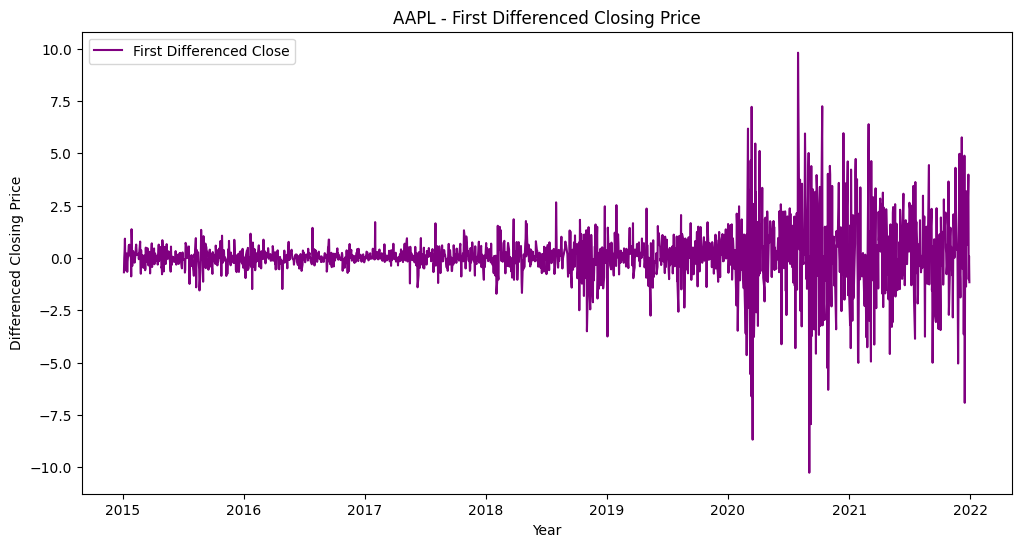

In [4]:
import matplotlib.pyplot as plt

# Plot the first differenced series
plt.figure(figsize=(12,6))
plt.plot(df_diff.index, df_diff["Close_diff"], label="First Differenced Close", color='purple')
plt.xlabel("Year")
plt.ylabel("Differenced Closing Price")
plt.title("AAPL - First Differenced Closing Price")
plt.legend()
plt.show()
